In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
iris = load_iris()

In [60]:
import numpy as np
import sklearn.metrics as met
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [61]:
x = iris.data
y = iris.target

In [62]:
df = pd.DataFrame(x, columns=iris.feature_names)
df ['Species'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [64]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [65]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [66]:
model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [67]:
y_pred = model.predict(xtest)

In [72]:
accuracy = model.score(xtest, ytest)
print (accuracy)

0.9333333333333333


In [69]:
cm = confusion_matrix(ytest, y_pred)
print (cm)

[[ 9  0  0]
 [ 0  9  0]
 [ 0  2 10]]


In [70]:
probabilities = model.predict_proba(xtest)
softmax_scores = [np.exp(x)/sum(np.exp(x)) for x in probabilities]
print (softmax_scores)

[array([0.22090227, 0.25106203, 0.5280357 ]), array([0.21703175, 0.23256823, 0.55040003]), array([0.2317731 , 0.42581087, 0.34241603]), array([0.22638586, 0.28364821, 0.48996594]), array([0.23263983, 0.35225426, 0.41510591]), array([0.23200847, 0.32673764, 0.44125389]), array([0.56446632, 0.22120854, 0.21432513]), array([0.23698051, 0.4885671 , 0.27445239]), array([0.22524557, 0.27596152, 0.49879291]), array([0.22835121, 0.47880898, 0.2928398 ]), array([0.5734412 , 0.21405721, 0.21250159]), array([0.22954984, 0.49155389, 0.27889627]), array([0.21505256, 0.22406531, 0.56088213]), array([0.22489455, 0.27190527, 0.50320018]), array([0.23713156, 0.44590039, 0.31696805]), array([0.57235514, 0.21491796, 0.2127269 ]), array([0.22287791, 0.52496348, 0.25215861]), array([0.56512107, 0.22068395, 0.21419498]), array([0.22877096, 0.50655872, 0.26467032]), array([0.21311122, 0.21639991, 0.57048887]), array([0.21375052, 0.21886472, 0.56738476]), array([0.22254772, 0.55284259, 0.22460969]), array([0.

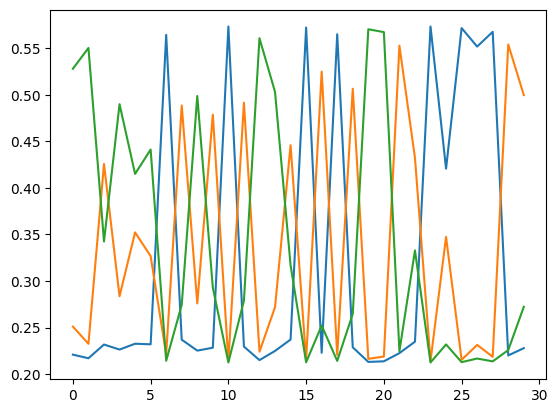

In [71]:
plt.plot(softmax_scores)